In [1]:
import os
import copy
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, ShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
dados_train = dados = pd.read_csv('/content/drive/MyDrive/Python - Estudos/Titanic/Input/train.csv') 

In [3]:
dados_test = pd.read_csv('/content/drive/MyDrive/Python - Estudos/Titanic/Input/test.csv')

In [4]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dados_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Análise Descritiva:


In [6]:
dados_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dados_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
dados_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
dados_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_train.isnull().sum().sort_values(ascending=False)
percentual = (dados_train.isnull().sum()/dados_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [11]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_test.isnull().sum().sort_values(ascending=False)
percentual = (dados_test.isnull().sum()/dados_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


0    62.0
1    38.0
Name: Survived, dtype: float64


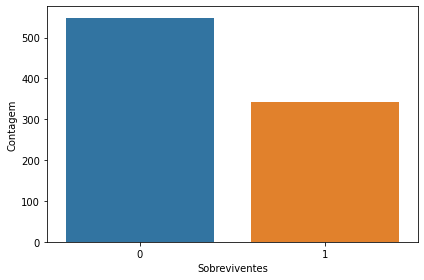

In [12]:
print(np.round(dados_train['Survived'].value_counts(normalize=True), 2)*100)
sns.countplot(data=dados_train,  x="Survived")
plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')
plt.tight_layout()

Olhando nosso dataset, percebemos que há mais indivíduos que morreram do que sobreviveram. Contudo, não chega a ser tão discrepante a diferença, uma ver que 62% faleceram enquanto 38% sobreviveram do nosso dataset de treino.

male      65.0
female    35.0
Name: Sex, dtype: float64


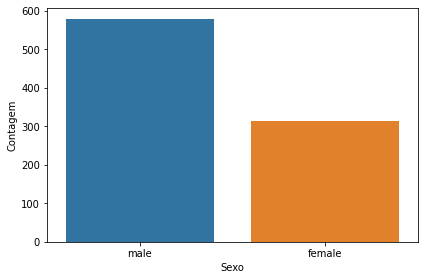

In [13]:
print(np.round(dados_train['Sex'].value_counts(normalize=True), 2)*100)
sns.countplot(data=dados_train,  x="Sex")
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.tight_layout()

Com relação aos indivíduos, cerca de 65% a bordo eram homens, enquanto 35% mulheres.

3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64


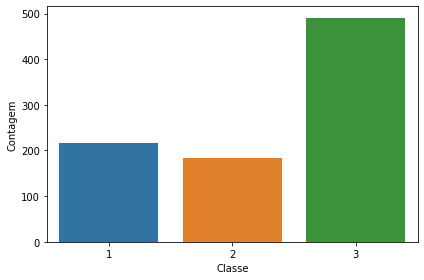

In [14]:
print(np.round(dados_train['Pclass'].value_counts(normalize=True), 2)*100)
sns.countplot(data=dados_train,  x="Pclass")
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.tight_layout()

Já analisando a classe, a classe majoritária foi a terceira classe, com 55% dos embarcados. Primeira classe ficou em segundo lugar, com 24%, enquanto segunda classe foi a que apresentou menor percentual, com 21%.

S    72.0
C    19.0
Q     9.0
Name: Embarked, dtype: float64


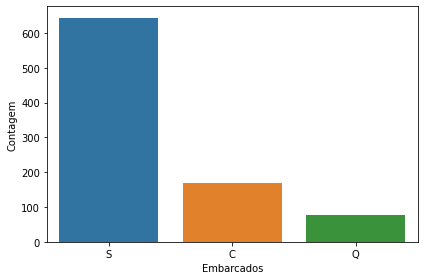

In [15]:
print(np.round(dados_train['Embarked'].value_counts(normalize=True), 2)*100)
sns.countplot(data=dados_train,  x="Embarked")
plt.xlabel('Embarcados')
plt.ylabel('Contagem')
plt.tight_layout()

O principal portão de embarque foi o S, totalizando 72% das embarcações. O portão C representou 19% das embarcações, enquanto o Q teve apenas 9%.

0    68.0
1    23.0
2     3.0
4     2.0
3     2.0
8     1.0
5     1.0
Name: SibSp, dtype: float64


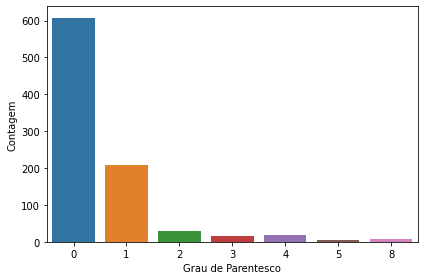

In [16]:
print(np.round(dados_train['SibSp'].value_counts(normalize=True), 2)*100)
sns.countplot(data=dados_train,  x="SibSp")
plt.xlabel('Grau de Parentesco')
plt.ylabel('Contagem')
plt.tight_layout()

Quando analisado o grau de parentesco excluindo as crianças, 68% das pessoas não possuiam nenhum grau e 23% possui algum parente de primeiro grau. Já os demais graus de parentesco tiveram números e proporções bem reduzidas.

0    76.0
1    13.0
2     9.0
5     1.0
3     1.0
4     0.0
6     0.0
Name: Parch, dtype: float64


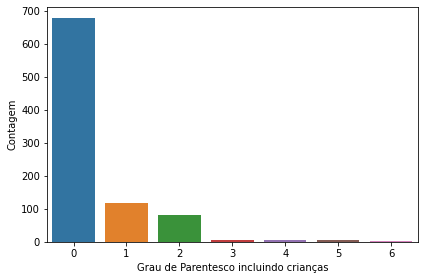

In [17]:
print(np.round(dados_train['Parch'].value_counts(normalize=True), 2)*100)
sns.countplot(data=dados_train,  x="Parch")
plt.xlabel('Grau de Parentesco incluindo crianças')
plt.ylabel('Contagem')
plt.tight_layout()

Quando inserido as crianças no grau de parentesco, 76% apresentaram nenhum grau, 13% primeiro grau, 9% segundo grau, já os demais tiveram uma porporção bem reduzida.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


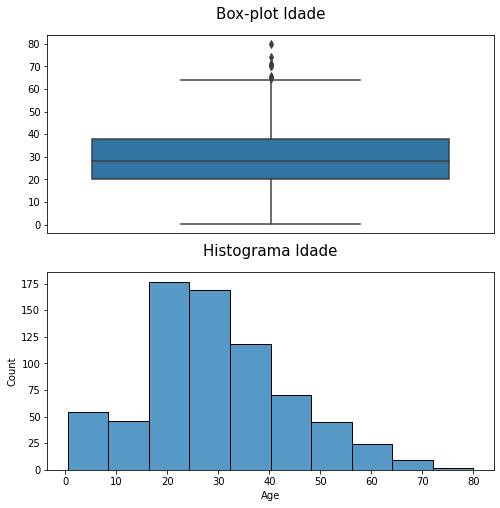

In [18]:
print(dados_train['Age'].describe())

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

#plt.subplots(figsize = (6.5,5), dpi = 100)
g = sns.boxplot(data=dados_train['Age'], ax=ax[0])
g.set_title('Box-plot Idade', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=dados_train, x="Age", bins=10, ax=ax[1])
hist.set_title('Histograma Idade', fontsize = 15, y =1.05)
#hist.set(xticklabels=[]) 
#hist.set(xlabel=None)
#hist.tick_params(bottom=False)

plt.show()

Analisando a idade, percebemos alguns outliers positivos (apesar de nenhum valor muito discrepante, a idade máxima foi de 80 anos) e também que boa parte dos passageiros tinham idade inferior a 40 anos.

Essa seção tem como objetivo verificar o percentual de cada tipo em relação aos indivíduos que sobreviveram ao não no nosso dataset.

In [19]:
def bar_chart(feature, dataset):

    """
    Aqui temos dois objetivos: fazer um gráfico de barras entre os sobreviventes e 
    não sobreviventes mostrando o % de cada variável qualitativa neles afim de tirarmos
    alguns insights. Além disso também mostra esses números para termos uma melhor precisão.
    """
    survived = dataset[dataset['Survived']==1][feature].value_counts(normalize=True)
    print(f"A distribuição do percentual da variável {feature} que sobreviveram foi:")
    print(np.round(dataset[dataset['Survived']==1][feature].value_counts(normalize=True), 2)*100)
    
    dead = dataset[dataset['Survived']==0][feature].value_counts(normalize=True)
    print(f"\nA distribuição do percentual da variável {feature} que não sobreviveram foi:")
    print(np.round(dataset[dataset['Survived']==0][feature].value_counts(normalize=True), 2)*100)
    
    df = pd.DataFrame([survived,dead])
    df.index = ['Sobreviveu','Não Sobreviveu']
    df.plot(kind='bar', stacked=True, colormap='Set2', figsize=(7,5))
    plt.xticks(rotation=0)
    plt.title(feature, fontsize = 15, y =1.05)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()
    return

A distribuição do percentual da variável Sex que sobreviveram foi:
female    68.0
male      32.0
Name: Sex, dtype: float64

A distribuição do percentual da variável Sex que não sobreviveram foi:
male      85.0
female    15.0
Name: Sex, dtype: float64


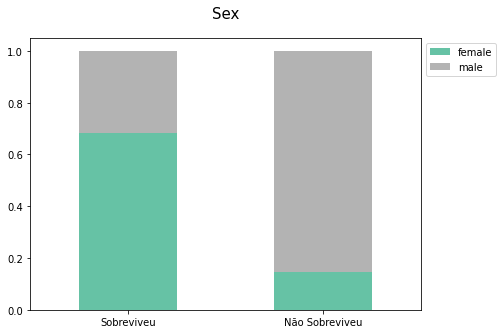

In [20]:
bar_chart('Sex', dados_train)

Analisando o sexo, 68% dos sobreviventes eram mulheres e 32% homens. Em relação aos que não sobreviveram, 86% eram homens, enquanto 15% eram mulheres. Sexo parece um bom indicativo se o individuo sobreviveu ou não. 

A distribuição do percentual da variável Pclass que sobreviveram foi:
1    40.0
3    35.0
2    25.0
Name: Pclass, dtype: float64

A distribuição do percentual da variável Pclass que não sobreviveram foi:
3    68.0
2    18.0
1    15.0
Name: Pclass, dtype: float64


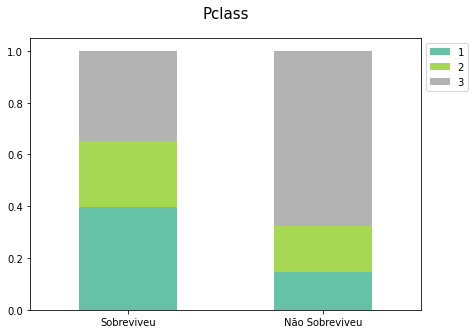

In [21]:
bar_chart('Pclass', dados_train)

Já em relação a classe, olhando o subgrupo dos sobreviventes, 40 % dos que sobreviveram era da primeira classe, 35% da terceira classe e 25% da segunda classe. Em relação aos que não sobreviveram,  68% eram da terceira classe, 18% da segunda e 15% da primeira.

A distribuição do percentual da variável SibSp que sobreviveram foi:
0    61.0
1    33.0
2     4.0
3     1.0
4     1.0
Name: SibSp, dtype: float64

A distribuição do percentual da variável SibSp que não sobreviveram foi:
0    72.0
1    18.0
4     3.0
2     3.0
3     2.0
8     1.0
5     1.0
Name: SibSp, dtype: float64


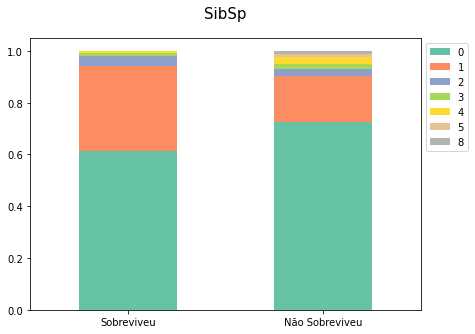

In [22]:
bar_chart('SibSp', dados_train)

<p style='text-align: justify;'>Tanto no subgrupo dos sobreviventes e não sobreviventes, aqueles que não possuem parentesco algum foram dominantes, sendo no subgrupo dos sobreviventes com 61% e no subgrupo dos não sobreviventes com 72% de participação. Em segundo lugar, em ambos os grupos, ficou com um grau de parentesco, sendo no subgrupo dos sobreviventes esse percentual de 33% enquanto no de não sobreviventes seu percentual foi de 18%. Já os demais graus de parentesco tiveram reduzida participação independente do subgrupo se sobreviveu ou não.

A distribuição do percentual da variável Parch que sobreviveram foi:
0    68.0
1    19.0
2    12.0
3     1.0
5     0.0
Name: Parch, dtype: float64

A distribuição do percentual da variável Parch que não sobreviveram foi:
0    81.0
1    10.0
2     7.0
5     1.0
4     1.0
3     0.0
6     0.0
Name: Parch, dtype: float64


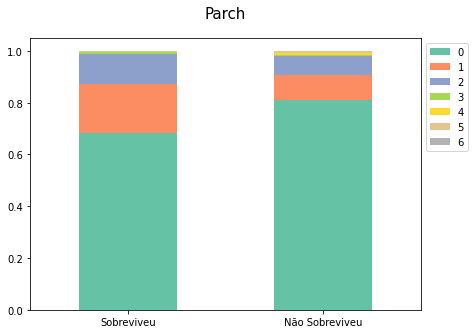

In [23]:
bar_chart('Parch', dados_train)

<p style='text-align: justify;'>Já o grau de parentesco incluindo crianças, novamente, nenhum grau foi o primeiro disparado em ambos os subgrupos. No de sobreviventes, com 68% e no de não sobreviventes com 81%. Em segundo lugar e em ambos os subgrupos, com um grau de parentesco, tendo o percentual de 19% nos sobreviventes e 10% nos não sobreviventes. Em terceiro, dois graus, com 12% no subgrupo dos sobreviventes e 7% no subgrupo dos não sobreviventes. Os demais graus tiveram um percentual bem reduzido.

A distribuição do percentual da variável Embarked que sobreviveram foi:
S    64.0
C    27.0
Q     9.0
Name: Embarked, dtype: float64

A distribuição do percentual da variável Embarked que não sobreviveram foi:
S    78.0
C    14.0
Q     9.0
Name: Embarked, dtype: float64


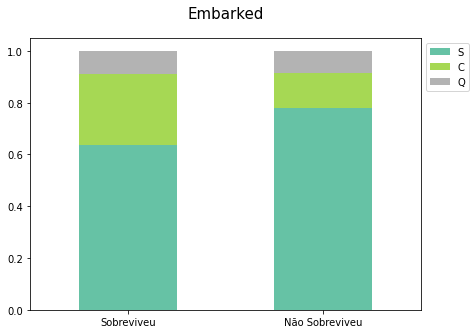

In [24]:
bar_chart('Embarked', dados_train)

<p style='text-align: justify;'>Por fim, onde ocorreu a embarcação. O portão S foi o primeiro em ambos os grupos, com o percentual de 64% entre os sobreviventes e 78% dos não sobreviventes, enquanto o portão C ficou na segunda colocação com 27% no subgrupos dos sobreviventes e 14% dos não sobreviventes. Na última colocação, o portão Q, em ambos os subrupos, com 9% em ambos.

In [25]:
sobreviventes = dados_train[dados_train['Survived']==1]
sobreviventes.reset_index(drop=True, inplace=True)

naosobreviventes = dados_train[dados_train['Survived']==0]
naosobreviventes.reset_index(drop=True, inplace=True)

In [26]:
sobreviventes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
337,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
338,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
339,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
340,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


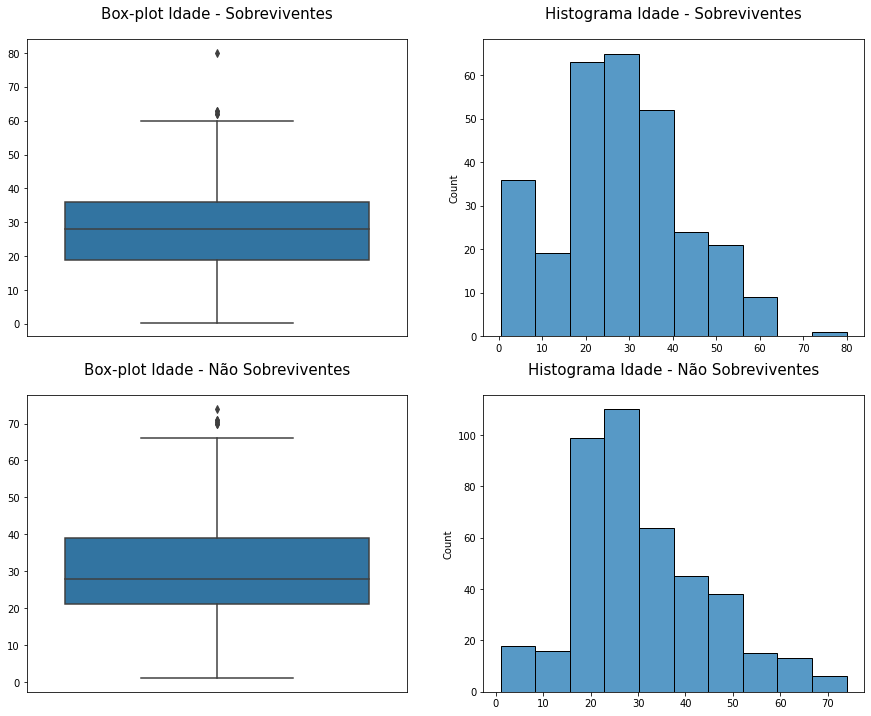

In [27]:
print(sobreviventes['Age'].describe())
print(f"\n{naosobreviventes['Age'].describe()}")

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

#plt.subplots(figsize = (6.5,5), dpi = 100)
g1 = sns.boxplot(data=sobreviventes['Age'], ax=ax[0, 0])
g1.set_title('Box-plot Idade - Sobreviventes', fontsize = 15, y =1.05)
g1.set(xticklabels=[]) 
g1.set(xlabel=None)
g1.tick_params(bottom=False)

hist1 = sns.histplot(data=sobreviventes, x="Age", bins=10, ax=ax[0, 1])
hist1.set_title('Histograma Idade - Sobreviventes', fontsize = 15, y =1.05)
hist1.set(xlabel=None)

g2 = sns.boxplot(data=naosobreviventes['Age'], ax=ax[1, 0])
g2.set_title('Box-plot Idade - Não Sobreviventes', fontsize = 15, y =1.05)
g2.set(xticklabels=[]) 
g2.set(xlabel=None)
g2.tick_params(bottom=False)

hist2 = sns.histplot(data=naosobreviventes, x="Age", bins=10, ax=ax[1, 1])
hist2.set_title('Histograma Idade - Não Sobreviventes', fontsize = 15, y =1.05)
hist2.set(xlabel=None)

plt.show()

<p style='text-align: justify;'>Verificando o box-plot entre os sobreviventes e não sobreviventes, ambos apresentam alguns outliers positivos, mas nada muito discrepente. Em relação ao box, o dos não sobreviventes tem uma média de idade ligeiramente maior. Essas estatísticas são reafrimadas pelo describre. O histograma reafirma as informações do describe, onde em ambos os histogramas, quase toda concentração da idade é inferior a 40 anos, contudo, o histograma dos sobreviventes, mostra uma concetração maior nas idades inferiores a 20 anos quando comparado com o histograma dos que não sobreviveram, indicando que pessoas mais jovem sobreviveram numa frequencia maior.</p>

# Tratando as variáveis:

In [28]:
dados_train.update(dados['Age'].fillna(math.floor(dados_train['Age'].mean())))
dados_test.update(dados_test['Age'].fillna(math.floor(dados_test['Age'].mean())))
dados_test.update(dados_test['Fare'].fillna(math.floor(dados_test['Fare'].mean())))

In [29]:
def titulo_separando(nome):
    """
    Função que procura o tittle do embarcado pelo Name.
    Input é a coluna com o name do embracado, uma string.
    Output é uma nova coluna, com o título como string.
    """
    if 'Miss' in nome:
        return 'Miss'
    elif 'Mr.' in nome:
        return 'Mr'
    elif 'Mrs.' in nome:
        return 'Mrs'
    else:
        return 'Outro'

In [30]:
dados_train['Title'] = dados_train['Name'].apply(titulo_separando)
dados_test['Title'] = dados_test['Name'].apply(titulo_separando)

In [31]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Outro
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


A distribuição do percentual da variável Title que sobreviveram foi:
Miss     37.0
Mrs      29.0
Mr       24.0
Outro    10.0
Name: Title, dtype: float64

A distribuição do percentual da variável Title que não sobreviveram foi:
Mr       79.0
Miss     10.0
Outro     6.0
Mrs       5.0
Name: Title, dtype: float64


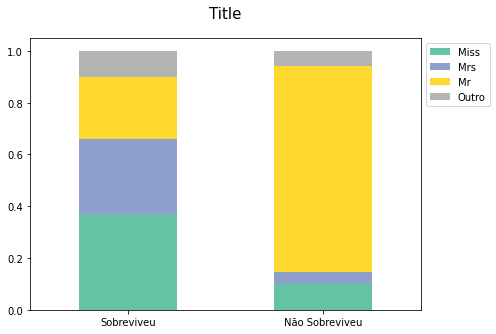

In [32]:
bar_chart('Title', dados_train)

<p style='text-align: justify;'>Analisando o Tittle dos subconjuntos temos que: nos que sobreviveram, Miss teve o maio percentual com 37%, Mrs foi o segundo com 29% e Mr teve 24%, muitos próximos esses dois, e por último, Outro título, com 10%. Já o subconjunto dos que não sobreviveram, Mr foi dominante com 79%, seguido de Miss com 10%.

In [33]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Outro
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


O passo agora é tranformar Pclass, Sex, SibSp, Parch, Embarked e Title em dummies.

In [34]:
bins= [-1,0,2,4,13,20, 110]
labels = ['unknown','Infant','Toddler','Kid','Teen', 'Adult']
dados_train['AgeGroup'] = pd.cut(dados_train['Age'], bins=bins, labels=labels, right=False)
dados_test['AgeGroup'] = pd.cut(dados_test['Age'], bins=bins, labels=labels, right=False)

In [35]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Outro,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Teen
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Adult


In [36]:
dados_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Adult
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,Adult
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Outro,Adult
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Adult
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,Adult


In [37]:
tranformar_dummies = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'AgeGroup']

In [38]:
for coluna in tranformar_dummies:
    dados_train = pd.get_dummies(dados_train, columns=[coluna], prefix=[coluna])
    dados_test = pd.get_dummies(dados_test, columns=[coluna], prefix=[coluna])

In [39]:
dados_train

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Outro,AgeGroup_unknown,AgeGroup_Infant,AgeGroup_Toddler,AgeGroup_Kid,AgeGroup_Teen,AgeGroup_Adult
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,211536,13.0000,NaN,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,B42,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.0,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,C148,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [40]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_train.isnull().sum().sort_values(ascending=False)
percentual = (dados_train.isnull().sum()/dados_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
Cabin,687,77.104377
AgeGroup_Adult,0,0.000000
Pclass_3,0,0.000000
SibSp_4,0,0.000000
SibSp_3,0,0.000000
SibSp_2,0,0.000000
SibSp_1,0,0.000000
SibSp_0,0,0.000000
Sex_male,0,0.000000
Sex_female,0,0.000000


In [41]:
dados_train

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Outro,AgeGroup_unknown,AgeGroup_Infant,AgeGroup_Toddler,AgeGroup_Kid,AgeGroup_Teen,AgeGroup_Adult
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,211536,13.0000,NaN,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,B42,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.0,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,C148,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [42]:
dados_train['Fare']=dados_train['Fare'].replace(0, 1)
dados_test['Fare']=dados_test['Fare'].replace(0, 1)

In [43]:
dados_train['Fare'] = np.log(dados_train['Fare'])
dados_test['Fare'] = np.log(dados_test['Fare'])

# Modelagem:

Para a modelagem, fiz os seguintes passos:

- Verifiquei as variáveis relevantes através da correlação de Pearson.
- Validação-cruzada dos modelos, sem parâmetros, com as seguintes méttricas: accuracy, precision, recall e f1.
- Selecionei os três melhores modelos, usando como métrica 'accuracy' - essa é a métrica do desafio do Kaggle.
- Apliquei um GridSearchCV nesses três melhores modelos, afim de encontrar os melhores parâmetros.
- Por fim, analisei os resultados dos modelos com os melhores parâmetros e selecionei aquele que teve melhor accuracy.

In [44]:
# dropando colunas que não possuem informações muito uteis.
colunas_a_dropar = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']

In [45]:
dados = dados_train.drop(colunas_a_dropar, axis = 1)

In [46]:
# verificando quais variáveis explicativas devemos manter.
correlacao = dados.corr()
target = 'Survived'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.1)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.1))]
manter = list(corr.index)
variaveis = {'target': target,
             'manter': manter}

In [47]:
variaveis

{'manter': ['Fare',
  'Pclass_1',
  'Pclass_3',
  'Sex_female',
  'Sex_male',
  'SibSp_0',
  'SibSp_1',
  'Parch_0',
  'Parch_1',
  'Embarked_C',
  'Embarked_S',
  'Title_Miss',
  'Title_Mr',
  'Title_Mrs',
  'AgeGroup_Infant'],
 'target': 'Survived'}

In [48]:
def rodando_modelos(dataset, lista_variaveis, modelos):
    
    """
    Roda os modelos selecionados sem parâmetros com um ShuffleSplit, 10 vezes,
    para nos gerar uma média das métrrica e selecionarmos os melhores modelos.
    
    O objetivo é fazer uma validação cruzada 'manual' com n = 10 e verificar os
    resultados das metricas com essa validação cruzada.
    
    Como input temos:
    dataset: dataframe com os dados e as variáveis.
    lista_variaveis: dicionário com as variáveis relevantes e a variável-alvo.
    modelos: dicionário com os modelos a ser realizado nosso teste e nos dar ideia
    da performance de cada um, dado as métricas indicadas.
    
    Output é um dataframe com a média das métricas de cada modelo, uma vez que foi
    realizado a validação-cruzada.
    """
    # cria o dicionário para armazenar os resultados.
    results = {}
    
    # lista com as métricas
    indices = ['accuracy', 'recall', 'precision', 'f1']

    # separando as variáveis do dataset entre explicativas e a variável-alvo:
    X = dataset[lista_variaveis['manter']]
    y = dataset[lista_variaveis['target']]
    
    # preparo para fazer a validação cruzada.
    ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

    for model in modelos:
        acc_ = []
        rec_ = []
        prec_ = []
        f1_ = []
        
        # faz a validação-cruzada pra cada modelo
        for train_index, test_index in ss.split(X):
            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y.loc[train_index], y.loc[test_index]

            model_fit = modelos[model].fit(X_train, y_train)

            predict = model_fit.predict(X_test)
            
            # cálculo das métricas
            acc = accuracy_score(y_test, predict) * 100
            rec = precision_score(y_test, predict) * 100
            prec = recall_score(y_test, predict) * 100
            f1 = f1_score(y_test, predict) * 100

            # armazenando os resultados em listas.    
            acc_.append(acc)
            rec_.append(rec)
            prec_.append(prec)
            f1_.append(f1)

        results[model] = [np.mean(acc_).round(2), np.mean(rec_).round(2), np.mean(prec_).round(2), np.mean(f1_).round(2)]
        final = pd.DataFrame(results, index = indices)
    
    return final.round(4)

In [49]:
def grafico_resumo(resultados_modelos, metrica):
    
    """
    Gera os gráficos da métricas para enriquecer nossa análise.
    """
    plt.rcParams['figure.figsize']=12,5
    sns.set_style('darkgrid')
    ax = sns.barplot(x=list(resultados_modelos.T.index), y=resultados_modelos.T[metrica], palette = "husl", saturation =2.0)
    plt.xlabel('Classification Models', fontsize = 20 )
    plt.ylabel(metrica, fontsize = 20)
    plt.title(metrica + ' of different Classification Models', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,4)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
    plt.show()
    
    return

In [50]:
models = {'Logistic Regression': LogisticRegression(),
         'SVC': SVC(),
         'K Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting': GradientBoostingClassifier(),
         'LGBM': LGBMClassifier(),
         'XGBC': XGBClassifier()}

In [51]:
modelos_ = rodando_modelos(dados, variaveis, models)

In [52]:
modelos_

,Logistic Regression,SVC,K Neighbors,Decision Tree,Random Forest,Gradient Boosting,LGBM,XGBC
accuracy,80.90,82.39,79.48,80.07,79.85,81.19,82.16,81.72
recall,76.44,80.95,76.40,77.66,75.75,80.12,79.64,80.49
precision,72.91,71.08,67.96,68.57,71.16,68.45,72.85,69.76
f1,74.63,75.66,71.84,72.66,73.14,73.71,75.93,74.62


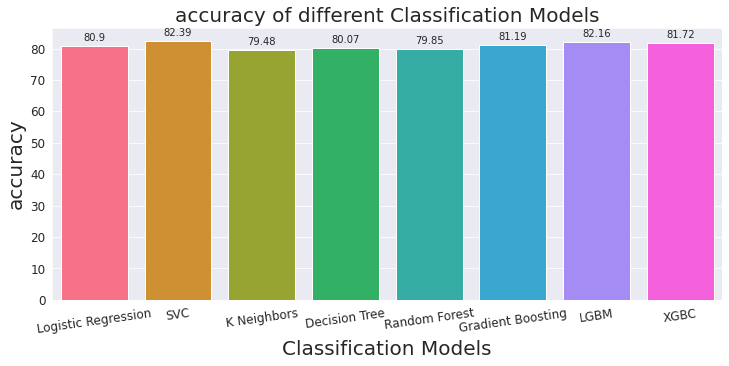

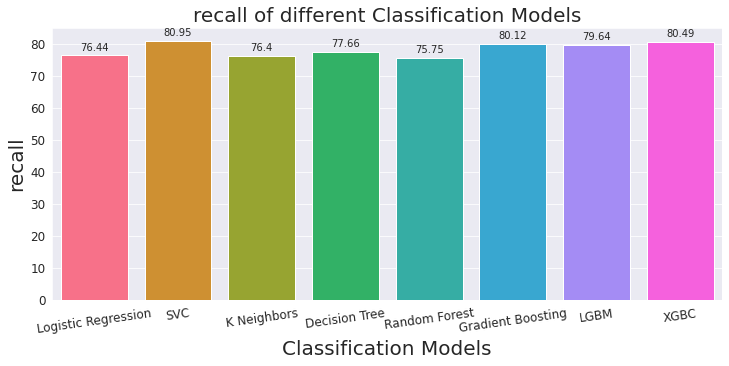

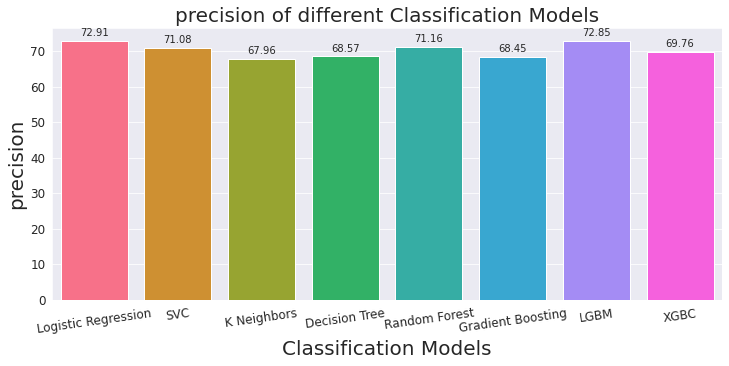

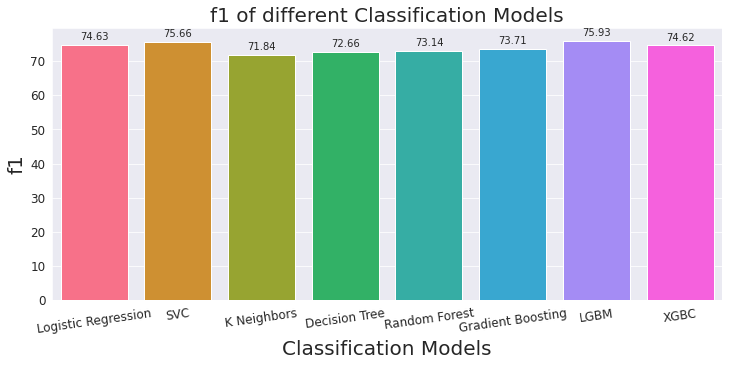

In [53]:
for i in list(modelos_.index):
    grafico_resumo(modelos_, i)

Análise dos resultados após a validação-cruzada dos modelos:

- accuracy de todos eles foi muito próxima. O melhor modelo foi o SVC, seguido do LGBM e em terceiro o XGBC.
- Para o recall, novamente SVM teve o melhor desempenho. Em segundo lugar ficou o XGBC e em terceiro, Gradient Boosting.
- O modelo que apresemtou melhor precision foi Logistic Regression, o segundo melhor foi o LGBM e o terceiro, Random Forest.
- f1, teve LGBM em primeiro lugar, em segundo, SVC, e terceiro, Logistic Regression.

Em questão de métricas, nenhum modelo foi soberano em relação aos outros, ou seja, quando a métrica mudou, houve mudança na ordem dos melhores estimadores também. Apesar disso, o resultado dos modelos foi bem semelhante sem grandes diferenças entre eles.

In [54]:
def selecionando_melhores_modelos(resultado_modelos, metrica_selecionada):
    """
    Dado o dataframe com as métricas, essa função retorna os três melhores modelos 
    que tiveram melhor resultado para uma métrica especificada.

    resultado_modelos: dataframe com os resultados das métricas e modelos.
    metrica_selecionada: métrica a retornar os melhores modelos, é uma string.

    Output é uma lista com os três melhores modelos para realizar o gridsearch.
    """
    return list(resultado_modelos.T[metrica_selecionada].sort_values(ascending=False).index)[:3]

In [55]:
melhor_performance = selecionando_melhores_modelos(modelos_, 'accuracy')
melhor_performance

['SVC', 'LGBM', 'XGBC']

In [56]:
modelos_.index

Index(['accuracy', 'recall', 'precision', 'f1'], dtype='object')

In [57]:
for metrica in modelos_.index:
  print(f'Os três melhores modelos da métrica {metrica} foram:')
  print(selecionando_melhores_modelos(modelos_, metrica))
  print(' ')

Os três melhores modelos da métrica accuracy foram:
['SVC', 'LGBM', 'XGBC']
 
Os três melhores modelos da métrica recall foram:
['SVC', 'XGBC', 'Gradient Boosting']
 
Os três melhores modelos da métrica precision foram:
['Logistic Regression', 'LGBM', 'Random Forest']
 
Os três melhores modelos da métrica f1 foram:
['LGBM', 'SVC', 'Logistic Regression']
 


In [58]:
models = {'Logistic Regression': LogisticRegression(),
         'SVC': SVC(),
         'K Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting': GradientBoostingClassifier(),
         'LGBM': LGBMClassifier(),
         'XGBC': XGBClassifier()}

In [59]:
parameters_gbc = {"learning_rate": [0.01, 0.025, 0.1],
                  "min_samples_split": [0.1, 0.5, 2],
                  "min_samples_leaf": [0.1, 0.5, 2],
                  "max_depth":[2, 10, 15]}

parameters_lr = {"penalty": ['l1', 'l2', 'elasticnet'],
                 "C": [0.1, 0.5, 1, 1.5, 3],
                 "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 "max_iter":[100, 200, 300]}

parameters_knn = {'n_neighbors': [1, 3, 7, 15, 35],
                  'leaf_size': [1, 5 ,7, 15],
                  'p': [1,2],
                  'weights': ['uniform', 'distance'],
                  'metric': ['minkowski', 'chebyshev']}

parameters_dtc = {"splitter":["best"],
                  "max_depth" : [1, 3, 5, 10],
                  "min_samples_leaf":[1, 3, 5, 10],
                  "min_weight_fraction_leaf":[0.2, 0.5, 0.9],
                  "max_features":["auto","log2"],
                  "max_leaf_nodes":[10,30,40,90]}

parameters_svc = {'C': [0.1, 1, 10, 100], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

parameters_rfc = {'n_estimators': [100, 300, 800],
                  'max_depth': [5, 30],
                  'min_samples_split': [1.0, 15, 100],
                  'min_samples_leaf': [1, 5, 10] }

parameters_lgbm = {"max_depth": [25, 50, 75],
                   "learning_rate" : [0.01, 0.05, 0.1],
                   "num_leaves": [300, 900, 1200],
                   "n_estimators": [200, 300, 500]}

parameters_xgb = {"max_depth": [10, 30, 50],
                  "min_child_weight" : [1, 3, 6],
                  "n_estimators": [200, 300, 500],
                  "learning_rate": [0.05, 0.1, 0.15, 0.25],}

parametros = {'Logistic Regression': parameters_lr,
              'SVC': parameters_svc,
              'K Neighbors': parameters_knn,
              'Decision Tree': parameters_dtc,
              'Random Forest': parameters_rfc,
              'Gradient Boosting': parameters_gbc,
              'LGBM': parameters_lgbm,
              'XGBC': parameters_xgb}

In [60]:
parametros

{'Decision Tree': {'max_depth': [1, 3, 5, 10],
  'max_features': ['auto', 'log2'],
  'max_leaf_nodes': [10, 30, 40, 90],
  'min_samples_leaf': [1, 3, 5, 10],
  'min_weight_fraction_leaf': [0.2, 0.5, 0.9],
  'splitter': ['best']},
 'Gradient Boosting': {'learning_rate': [0.01, 0.025, 0.1],
  'max_depth': [2, 10, 15],
  'min_samples_leaf': [0.1, 0.5, 2],
  'min_samples_split': [0.1, 0.5, 2]},
 'K Neighbors': {'leaf_size': [1, 5, 7, 15],
  'metric': ['minkowski', 'chebyshev'],
  'n_neighbors': [1, 3, 7, 15, 35],
  'p': [1, 2],
  'weights': ['uniform', 'distance']},
 'LGBM': {'learning_rate': [0.01, 0.05, 0.1],
  'max_depth': [25, 50, 75],
  'n_estimators': [200, 300, 500],
  'num_leaves': [300, 900, 1200]},
 'Logistic Regression': {'C': [0.1, 0.5, 1, 1.5, 3],
  'max_iter': [100, 200, 300],
  'penalty': ['l1', 'l2', 'elasticnet'],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
 'Random Forest': {'max_depth': [5, 30],
  'min_samples_leaf': [1, 5, 10],
  'min_samples_split'

In [61]:
dicionario = {'modelos': models,
             'parametros': parametros,
             'melhores_modelos': melhor_performance}

In [62]:
dicionario

{'melhores_modelos': ['SVC', 'LGBM', 'XGBC'],
 'modelos': {'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'Gradient Boosting': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
         

In [63]:
def rodando_modelos_GridSearchCV(dataset, lista_variaveis, dicionario_info):
    
    """
    Faz o gridsearch com validação-cruzada para os modelos selecionados.

    inputs:
    dataset: dataframe com as informações.
    lista_variaveis: dicionários com as variáveis explicativas a serem mantidas e
    a variável-alvo.
    dicionario_info: dicionário com as seguintes informações: 'modelos': dicionário com todos os modelos
    listados, sem os parâmetros; 'parametros': dicionário com os parametros de cada modelo para o gridsearch;
    melhores_modelos: lista com os melhores modelos dado uma métrica especificada.

    output: dicionário com a seguintes informações:
    'dataframe': dataframe com o resultado das métricas, dado que foi selecionado um melhor modelo.
    'estimadores': dicionário com o melhor estimador de cada modelo.
    """
    
    # gera os dicionarios que armazena os resultados.
    results = {}
    estimator = {}
    
    # metricas de classificação
    metricas = ['accuracy', 'recall', 'precision', 'f1']
    
    # separa o dataset em explicativas e variável-alvo
    X = dataset[lista_variaveis['manter']]
    y = dataset[lista_variaveis['target']]
    
    # separa o dataset em treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 42)
    
    for model in dicionario_info['melhores_modelos']:

        # faz o gridsearch do modelo
        model_fit = GridSearchCV(dicionario_info['modelos'][model], param_grid = dicionario_info['parametros'][model], 
                                 scoring=metricas, verbose=True, refit='accuracy', return_train_score=False, cv = 10, 
                                 n_jobs =-1).fit(X_train, y_train).best_estimator_
        # previsão
        predict = model_fit.predict(X_test)

        # cálculo das métricas
        acc = accuracy_score(y_test, predict) * 100
        rec = precision_score(y_test, predict) * 100
        prec = recall_score(y_test, predict) * 100
        f1 = f1_score(y_test, predict) * 100

        results[model] = [(acc).round(2), (rec).round(2), (prec).round(2), (f1).round(2)]
        estimator[model] = model_fit
        final = pd.DataFrame(results, index = metricas)
    
        dicionario_final = {'dataframe': final,
                            'estimadores': estimator}
    
    return dicionario_final

In [64]:
rodando_modelos = rodando_modelos_GridSearchCV(dados, variaveis, dicionario)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.2min finished


In [65]:
rodando_modelos['dataframe']

,SVC,LGBM,XGBC
accuracy,80.97,79.85,79.10
recall,81.91,80.00,77.78
precision,69.37,68.47,69.37
f1,75.12,73.79,73.33


In [66]:
modelos_

,Logistic Regression,SVC,K Neighbors,Decision Tree,Random Forest,Gradient Boosting,LGBM,XGBC
accuracy,80.90,82.39,79.48,80.07,79.85,81.19,82.16,81.72
recall,76.44,80.95,76.40,77.66,75.75,80.12,79.64,80.49
precision,72.91,71.08,67.96,68.57,71.16,68.45,72.85,69.76
f1,74.63,75.66,71.84,72.66,73.14,73.71,75.93,74.62


In [67]:
rodando_modelos['estimadores']

{'LGBM': LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.01, max_depth=25,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 'SVC': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'XGBC': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=10,
               min_child_weight=3, missing=None, n_estimato

In [68]:
def gerando_matriz_confusao(dataset, lista_variaveis, melhores_estimadores):

    """
    Imputa a matriz de confusão e o report de classificação. Fornece mais informações para detalhar mais
    nossa análise.
    
    dataset: dataset com os dados
    lista_variaveis: variáveis a serem mantidas ou não.
    melhores_estimadores: dicionário que contém as listas com os parâmetros de cada estimador
    
    output é o print da matriz de confusão e o report de classificação dos modelos com os melhores parâmetros.
    """
    
    for estimadores in melhores_estimadores['estimadores'].keys():

        X = dataset[lista_variaveis['manter']]
        y = dataset[lista_variaveis['target']]

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 42)

        melhores_estimadores['estimadores'][estimadores].fit(X_train, y_train)

        predictions = melhores_estimadores['estimadores'][estimadores].predict(X_test)

        conf = confusion_matrix(y_test, predictions)

        print(f'A Matriz de confusão do estimador {estimadores}:')
        print(conf)

        print(f'\nO report de classificação do estimador {estimadores}:')
        print(classification_report(y_test, predictions))
    
    return

In [69]:
confusao = gerando_matriz_confusao(dados, variaveis, rodando_modelos)

A Matriz de confusão do estimador SVC:
[[140  17]
 [ 34  77]]

O report de classificação do estimador SVC:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.82      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

A Matriz de confusão do estimador LGBM:
[[138  19]
 [ 35  76]]

O report de classificação do estimador LGBM:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.80      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

A Matriz de confusão do estimador XGBC:
[[135  22]
 [ 34  77]]

O report de classificação do estimador XGBC:
              precisi

<p style='text-align: justify;'>Olhando nosso reporte de classificação, podemos fazer algumas análises. Nosso melhor accuracy foi de 0.81 (SVC), ou seja, quando testado o modelo, acertamos em média 81% das previsões. Contudo, podemos fazer uma exploração ainda mais profunda, desmembrando entre os que não sobreviveram (0) e aqueles que sobreviveram (1).

- Em todos os modelos, os resultados foram muito semelhantes. Ainda assim, SVC teve melhor performance em todas as métricas.

In [70]:
def selecionando_melhor_estimador(dataset, metrica):
    
    """
    Selelciona o melhor estimador após o gridsearch dado uma métrica escolhida.
    """
    
    estimador = dataset['dataframe'].T[metrica].idxmax()
    
    print(f'O estimador escolhido foi o {estimador}.')
    
    return estimador

In [71]:
melhor_estimador = selecionando_melhor_estimador(rodando_modelos, 'accuracy')

O estimador escolhido foi o SVC.


In [72]:
rodando_modelos['estimadores']

{'LGBM': LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.01, max_depth=25,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 'SVC': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'XGBC': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=10,
               min_child_weight=3, missing=None, n_estimato

In [73]:
rodando_modelos['estimadores'][melhor_estimador]

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
X_test = dados_test[variaveis['manter']]

In [75]:
predictions = rodando_modelos['estimadores'][melhor_estimador].predict(X_test)

In [76]:
dados_test['Survived'] = predictions

In [77]:
output = dados_test[['PassengerId', 'Survived']]

In [78]:
output.to_csv('/content/drive/MyDrive/Python - Estudos/Titanic/Output/svc.csv', index = False)